# Enunciado
Implementar y analizar el comportamiento del enfriamiento simulado para alcanzar
la solución óptima del problema que se describe a continuación:

Obtener el mínimo global de la siguiente función:

$$
f(x) = \dfrac{cos(x)}{x}, x \in [0,30]
$$

Mostrar gráficamente la evolución de los valores de $x$ y $f$ considerados a lo largo de
las iteraciones de la metaheurística.



##### La siguiente celda muestra los imports necesarios para poder ejecutar el agoritmo

In [1]:
import funciones as fn
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

print("Se han cargado todas las librerias necesaias")

Se han cargado todas las librerias necesaias


### Seleccionar las características del algoritmo

#### Seleccionar la función a optimizar, definir el intervalo.

In [2]:
INTERVALO = (0,30)
FUNCION  = fn.coseno

### Funciones del algoritmo

Obtener un vecino a una solución

In [3]:
def vecindad(x, movimiento=1):
    vecindad = (INTERVALO[1] - INTERVALO[0]) * movimiento / 10
    delta = (-vecindad/2.) + vecindad * rnd.random_sample()
    return fn.ajustar_valor(delta+x, INTERVALO)

Probabilidad con la que se va a aceptar una solución

In [4]:
def probabilidad_aceptacion(coste, coste_nuevo, temperatura):
    # si mejora la solución actual se acepta siempre
    if coste_nuevo < coste:
        return 1
    # en caso contrario, la aceptación dependerá de la temperatura,
    # a medida que avanza el problema menor temperatura, menor probabilidad de aceptación
    else:
        probabilidad = np.exp(- (coste_nuevo - coste) / temperatura)
        return probabilidad

Variación de la temperatura a medida que avanza el algoritmo

In [5]:
def temperatura(estado):
    return max(0.01, min(1, 1 - estado))

### Algoritmo

Algoritmo en pseudocódigo aquí

In [6]:
def recocido_simulado(funcion,
                      vecindad,
                      x_inicial,
                      probabilidad_aceptacion,
                      temperatura,
                      max_iteraciones=1000,
                      informacion=1):
    x = x_inicial
    y = funcion(x)
    valores_x, valores_y = [x], [y]
    for iteracion in range(max_iteraciones):
        estado = iteracion / float(max_iteraciones)
        T = temperatura(estado)
        x_vecina = vecindad(x, estado)
        y_vecina = funcion(x_vecina)
        if informacion >= 1:
            print("iteracion #{:>2}/{:>2} : T = {:>4.3g}, x = {:>4.3g}, y = {:>4.3g}, x_vecina = {:>4.3g}, y_vecina = {:>4.3g} ...".format(iteracion, max_iteraciones, T, x, y, x_vecina, y_vecina))
        if probabilidad_aceptacion(y, y_vecina, T) > rnd.random():
            x,y = x_vecina, y_vecina
            valores_x.append(x)
            valores_y.append(y)
    return x, funcion(x), valores_x, valores_y

### Ejecución del algoritmo

In [7]:
x, y, valores_x, valores_y = recocido_simulado(fn.abs, vecindad, 1, probabilidad_aceptacion, temperatura);

iteracion # 0/1000 : T =    1, x =    1, y =    1, x_vecina =    1, y_vecina =    1 ...
iteracion # 1/1000 : T = 0.999, x =    1, y =    1, x_vecina =    1, y_vecina =    1 ...
iteracion # 2/1000 : T = 0.998, x =    1, y =    1, x_vecina =    1, y_vecina =    1 ...
iteracion # 3/1000 : T = 0.997, x =    1, y =    1, x_vecina = 1.01, y_vecina = 1.01 ...
iteracion # 4/1000 : T = 0.996, x = 1.01, y = 1.01, x_vecina = 1.01, y_vecina = 1.01 ...
iteracion # 5/1000 : T = 0.995, x = 1.01, y = 1.01, x_vecina = 1.01, y_vecina = 1.01 ...
iteracion # 6/1000 : T = 0.994, x = 1.01, y = 1.01, x_vecina = 1.01, y_vecina = 1.01 ...
iteracion # 7/1000 : T = 0.993, x = 1.01, y = 1.01, x_vecina =    1, y_vecina =    1 ...
iteracion # 8/1000 : T = 0.992, x =    1, y =    1, x_vecina = 1.01, y_vecina = 1.01 ...
iteracion # 9/1000 : T = 0.991, x = 1.01, y = 1.01, x_vecina = 1.02, y_vecina = 1.02 ...
iteracion #10/1000 : T = 0.99, x = 1.02, y = 1.02, x_vecina = 1.02, y_vecina = 1.02 ...
iteracion #11/1000 : T 

In [8]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()

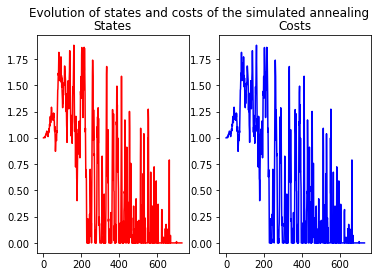

In [9]:
see_annealing(valores_x, valores_y)